In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Set up Necessary package

In [ ]:
# Cài đặt các thư viện cần thiết của YOLOv7
!pip install -r '/content/drive/MyDrive/Đồ Án/Đồ Án-NCKH/requirements.txt'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60.3 MB 1.2 MB/s 
     |████████████████████████████████| 298 kB 98.0 MB/s 
     |████████████████████████████████| 1.6 MB 59.6 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66
  Attempting uninstall: lmdb
    Found existing installation: lmdb 0.99
    Uninstalling lmdb-0.99:
      Successfully uninstalled lmdb-0.99


In [ ]:
%cd /content/drive/MyDrive/Đồ Án/Đồ Án-NCKH/yolov7

/content/drive/.shortcut-targets-by-id/1HWd83QBTKwMP-aeQKGiXgZKXslUyej-y/yolov7


In [ ]:
import numpy as np
import time
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from google.colab.patches import cv2_imshow

import glob
import torch
from PIL import Image, ImageDraw, ImageFont

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random

from models.experimental import attempt_load
from utils.datasets import LoadStreams, LoadImages
from utils.general import check_img_size, check_requirements, check_imshow, non_max_suppression, apply_classifier, \
    scale_coords, xyxy2xywh, strip_optimizer, set_logging, increment_path
from utils.plots import plot_one_box
from utils.torch_utils import select_device, load_classifier, time_synchronized, TracedModel

# Set up tool OCR.

In [ ]:
%cd /content/drive/MyDrive/Đồ Án/Đồ Án-NCKH

/content/drive/MyDrive/Đồ Án/Đồ Án-NCKH


In [ ]:
config = Cfg.load_config_from_name('vgg_transformer')

In [ ]:
config = Cfg.load_config_from_file('VietOCR/config.yml')
config['weights'] = 'VietOCR/weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cpu'
config['predictor']['beamsearch']=False

In [ ]:
detector = Predictor(config)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# Set up yolov7

## Version_1.


In [ ]:
# Convert PIL image to CV2.
"""opencvImage = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)"""

In [ ]:
# Convert CV2 image to PIL.
"""opencvImage = cv2.cvtColor(opencvImage, cv2.COLOR_BGR2RGB)"""
"""image = Image.fromarray(opencvImage)"""

In [ ]:
from models.experimental import attempt_load
from utils.general import non_max_suppression

WEIGHTS = "runs/train/exp8/weights/last.pt"
DEVICE = "cpu"
IMAGE_SIZE = 640

In [ ]:
CLASSES=['Phai', 'Phai-Dia diem', 'Phai-Khoang cach', 'Thang', 'Thang-Dia diem', 'Thang-Khoang cach', 'Trai', 'Trai-Dia diem', 'Trai-Khoang cach', 'Ra1', 'Ra1-Dia diem', 'Ra1-Khoang cach', 'Ra2', 'Ra2-Dia diem', 'Ra2-Khoang cach', 'Ra3', 'Ra3-Dia diem', 'Ra3-Khoang cach', 'Chech Phai', 'Chech Phai-Dia diem', 'Chech Phai-Khoang cach', 'Chech Trai', 'Chech Trai-Dia diem', 'Chech Trai-Khoang cach']

In [ ]:
model = attempt_load(WEIGHTS, map_location=DEVICE)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


In [ ]:
def predict(IMAGE_FILE, image_size=640):

    image = Image.open(IMAGE_FILE)
    image_copy= image.copy()
    image = np.asarray(image)
    image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
    
    # Resize image to the inference size
    ori_h, ori_w = image.shape[:2]
    image = cv2.resize(image, (image_size, image_size))
    
    # Transform image from numpy to torch format
    image_pt = torch.from_numpy(image).permute(2, 0, 1).to(DEVICE)
    image_pt = image_pt.float() / 255.0
    
    # Infer
    with torch.no_grad():
        pred = model(image_pt[None], augment=False)[0]
    
    # NMS
    pred = non_max_suppression(pred)[0].cpu().numpy()
    
    # Resize boxes to the original image size
    pred[:, [0, 2]] *= ori_w / image_size
    pred[:, [1, 3]] *= ori_h / image_size

    draw = ImageDraw.Draw(image_copy)
    for x1, y1, x2, y2, conf, class_id in pred:
    
        draw.rectangle(((x1, y1), (x2, y2)), width=2)
        draw.text((x1, y1), CLASSES[int(class_id)])
    return image_copy

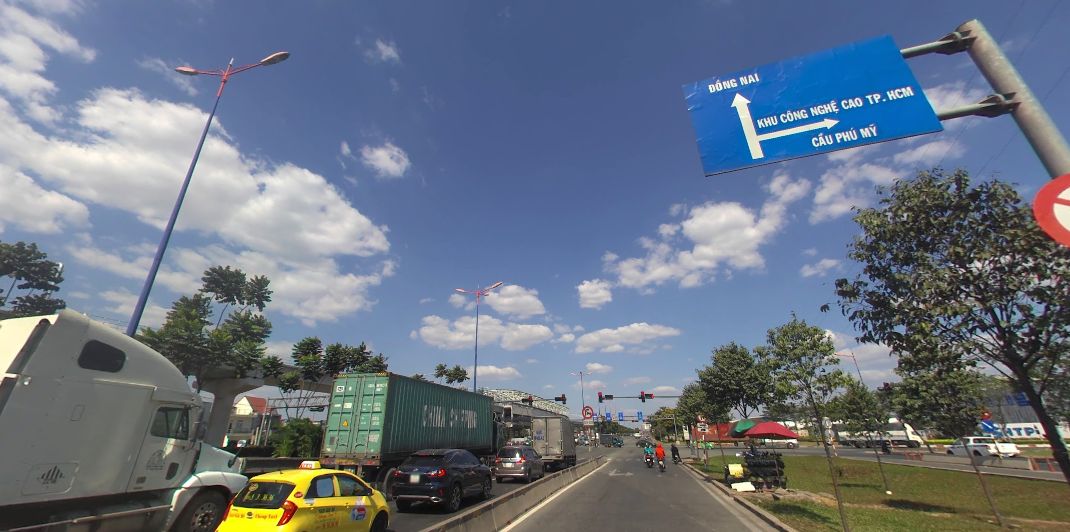

In [ ]:
IMAGE_FILE = "/content/sign6_183.png"
image = Image.open(IMAGE_FILE)
image

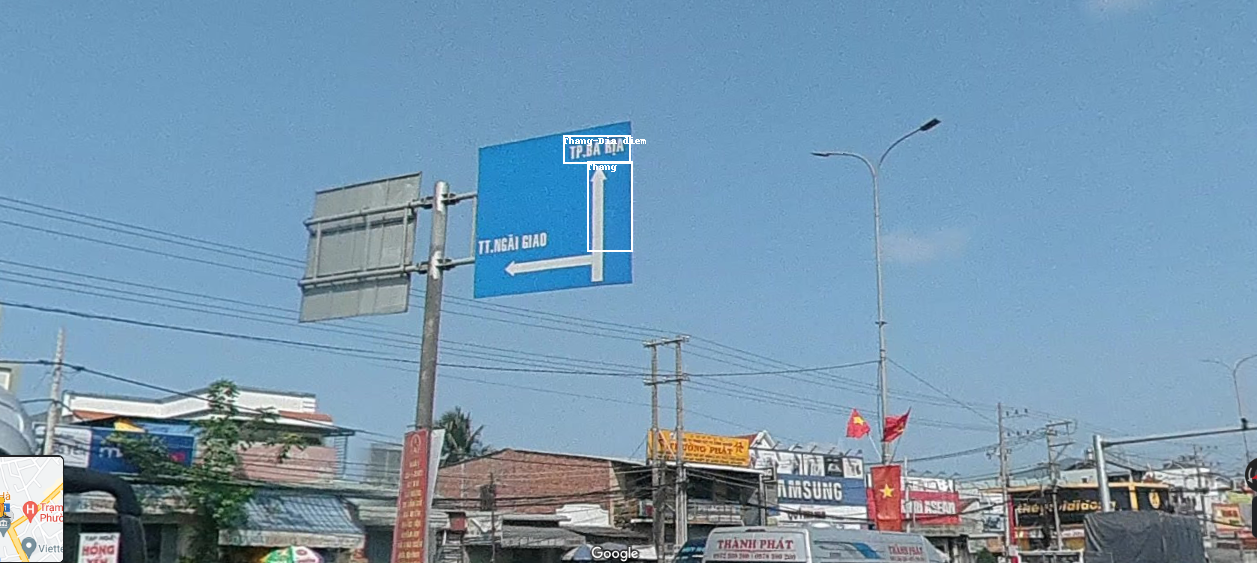

In [ ]:
IMAGE_FILE = "/content/sign5_126.png"
predict(IMAGE_FILE)

## Version_2


In [ ]:
%cd /content/drive/MyDrive/Đồ Án/Đồ Án-NCKH

/content/drive/MyDrive/Đồ Án/Đồ Án-NCKH


In [ ]:
def letterbox(img, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleFill=False, scaleup=True, stride=32):
    # Resize and pad image while meeting stride-multiple constraints
    shape = img.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better test mAP)
        r = min(r, 1.0)

    # Compute padding
    ratio = r, r  # width, height ratios
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding
    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding
    elif scaleFill:  # stretch
        dw, dh = 0.0, 0.0
        new_unpad = (new_shape[1], new_shape[0])
        ratio = new_shape[1] / shape[1], new_shape[0] / shape[0]  # width, height ratios

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        img = cv2.resize(img, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return img, ratio, (dw, dh)

In [ ]:
CLASSES=['Phai', 'Phai-Dia diem', 'Phai-Khoang cach', 'Thang', 'Thang-Dia diem', 'Thang-Khoang cach', 'Trai', 'Trai-Dia diem', 'Trai-Khoang cach', 'Ra1', 'Ra1-Dia diem', 'Ra1-Khoang cach', 'Ra2', 'Ra2-Dia diem', 'Ra2-Khoang cach', 'Ra3', 'Ra3-Dia diem', 'Ra3-Khoang cach', 'Chech Phai', 'Chech Phai-Dia diem', 'Chech Phai-Khoang cach', 'Chech Trai', 'Chech Trai-Dia diem', 'Chech Trai-Khoang cach']

In [ ]:
def yolo_detect(source_image_path , opt : dict):
  with torch.no_grad():
    weights, imgsz = opt['weights'], opt['img-size']
    set_logging()
    device = select_device(opt['device'])
    half = device.type != 'cpu'
    model = attempt_load(weights, map_location=device)  # load FP32 model
    stride = int(model.stride.max())  # model stride
    imgsz = check_img_size(imgsz, s=stride)  # check img_size
    if half:
      model.half()

    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
    if device.type != 'cpu':
      model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

    img0 = cv2.imread(source_image_path)
    img = letterbox(img0, imgsz, stride=stride)[0]
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
      img = img.unsqueeze(0)

    # Inference
    t1 = time_synchronized()
    pred = model(img, augment= False)[0]

    # Apply NMS
    classes = None
    if opt['classes']:
      classes = []
      for class_name in opt['classes']:

        classes.append(opt['classes'].index(class_name))


    pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
    t2 = time_synchronized()
    for i, det in enumerate(pred):
      s = ''
      s += '%gx%g ' % img.shape[2:]  # print string
      gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
      if len(det):
        det[:, :4] = scale_coords(img.shape[2:], det[:, :4], img0.shape).round()

        for c in det[:, -1].unique():
          n = (det[:, -1] == c).sum()  # detections per class
          s += f"{n} {names[int(c)]}{'s' * (n > 1)}, "  # add to string
      
        for *xyxy, conf, cls in reversed(det):

          label = f'{names[int(cls)]} {conf:.2f}'
          plot_one_box(xyxy, img0, label=label, color=colors[int(cls)], line_thickness=1)
  img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
  image = Image.fromarray(img0)
  return image
    

In [ ]:
classes_to_filter = None  
source_image_path = "/content/drive/MyDrive/Đồ Án/Đồ Án-NCKH/Test/HUY70.png"

opt  = {    
    "weights": "yolov7/runs/train/exp8/weights/last.pt", # Path to weights file default weights are for nano model
    "yaml"   : "yolov7/data/mydataset.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.5, # confidence threshold for inference.
    "iou-thres" : 0.4, # NMS IoU threshold for inference.
    "device" : 'cpu',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : CLASSES  # list of classes to filter or None

}

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


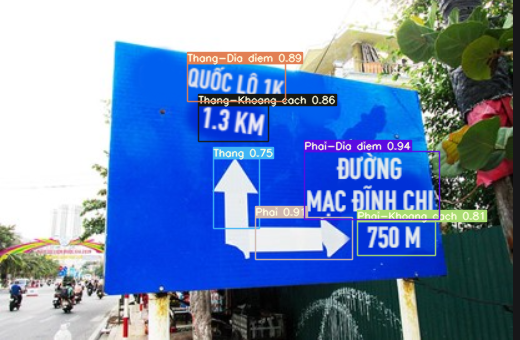

In [ ]:
yolo_detect(source_image_path , opt)

# SET UP CRAFT-TEXT_DETECTER

In [ ]:
# import craft functions
from craft_text_detector import (
    read_image,
    load_craftnet_model,
    load_refinenet_model,
    get_prediction,
    export_detected_regions,
    export_extra_results,
    empty_cuda_cache
)


# read image
#image = read_image(image_path)

# load models
refine_net = load_refinenet_model(cuda=False)
craft_net = load_craftnet_model(cuda=False)

Craft text refiner weight will be downloaded to /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth


Downloading...
From: https://drive.google.com/uc?id=1xcE9qpJXp4ofINwXWVhhQIh9S8Z7cuGj
To: /root/.craft_text_detector/weights/craft_refiner_CTW1500.pth
100%|██████████| 1.85M/1.85M [00:00<00:00, 66.7MB/s]
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "


Craft text detector weight will be downloaded to /root/.craft_text_detector/weights/craft_mlt_25k.pth


Downloading...
From: https://drive.google.com/uc?id=1bupFXqT-VU6Jjeul13XP7yx2Sg5IHr4J
To: /root/.craft_text_detector/weights/craft_mlt_25k.pth
100%|██████████| 83.2M/83.2M [00:00<00:00, 166MB/s]


In [ ]:
# perform prediction
def craft_text_func(list_img:list):
    opencvImage = cv2.cvtColor(np.array(list_img), cv2.COLOR_RGB2BGR)
    prediction_result = get_prediction(
    image= opencvImage,
    craft_net=craft_net,
    refine_net=refine_net,
    text_threshold=0.77,
    link_threshold=0.7,
    low_text= 0.22,
    cuda=False,)
    empty_cuda_cache()
    s=""
    img_demo = []
    toa_do = []
    for i in prediction_result["boxes"]:
        a=i.T[0]
        b=i.T[1]
        top_left_x = min(a)
        top_left_y = min(b)
        bot_right_x = max(a)
        bot_right_y = max(b)
        toa_do.append(top_left_x+top_left_y)
        img_demo.append(list_img.crop((  top_left_x,top_left_y,bot_right_x+1,bot_right_y+1)))
    list_toa_do = sorted(toa_do)
    toa_do =[ str(i) for i in toa_do]
    for i in list_toa_do:
      s = s + " " + detector.predict(img_demo[int(toa_do.index(str(i)))])
    return s


# YOLOV7 + OCR


In [ ]:
CLASSES=['Phai', 'Phai-Dia diem', 'Phai-Khoang cach', 'Thang', 'Thang-Dia diem', 'Thang-Khoang cach', 'Trai', 'Trai-Dia diem', 'Trai-Khoang cach', 'Ra1', 'Ra1-Dia diem', 'Ra1-Khoang cach', 'Ra2', 'Ra2-Dia diem', 'Ra2-Khoang cach', 'Ra3', 'Ra3-Dia diem', 'Ra3-Khoang cach', 'Chech Phai', 'Chech Phai-Dia diem', 'Chech Phai-Khoang cach', 'Chech Trai', 'Chech Trai-Dia diem', 'Chech Trai-Khoang cach']

In [ ]:
def info_box_func(source_image_path , opt: dict):
  with torch.no_grad():
    weights, imgsz = opt['weights'], opt['img-size']
    set_logging()
    device = select_device(opt['device'])
    half = device.type != 'cpu'
    model = attempt_load(weights, map_location=device)  # load FP32 model
    stride = int(model.stride.max())  # model stride
    imgsz = check_img_size(imgsz, s=stride)  # check img_size
    if half:
      model.half()

    names = model.module.names if hasattr(model, 'module') else model.names
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in names]
    if device.type != 'cpu':
      model(torch.zeros(1, 3, imgsz, imgsz).to(device).type_as(next(model.parameters())))

    img0 = cv2.imread(source_image_path)
    img_copy = img0.copy()
    img_copy= cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(img_copy)
    img = letterbox(img0, imgsz, stride=stride)[0]
    img = img[:, :, ::-1].transpose(2, 0, 1)  # BGR to RGB, to 3x416x416
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device)
    img = img.half() if half else img.float()  # uint8 to fp16/32
    img /= 255.0  # 0 - 255 to 0.0 - 1.0
    if img.ndimension() == 3:
      img = img.unsqueeze(0)

    # Inference
    pred = model(img, augment= False)[0]

    # Apply NMS
    classes = None
    if opt['classes']:
      classes = []
      for class_name in opt['classes']:

        classes.append(opt['classes'].index(class_name))


    pred = non_max_suppression(pred, opt['conf-thres'], opt['iou-thres'], classes= classes, agnostic= False)
    for i, det in enumerate(pred):
      gn = torch.tensor(img0.shape)[[1, 0, 1, 0]]
    pred=np.array(scale_coords(img.shape[2:], det[:, :], img0.shape).round())
    list_img = []
    list_index = []
    draw = ImageDraw.Draw(image)
    for x1, y1, x2, y2, conf, class_id in pred:
          list_index.append(class_id)    
          im_pil=image.crop((x1,y1, x2, y2))
          list_img.append(im_pil)
          

  return list_index,list_img

In [ ]:
# Hàm lấy index của hướng từ nhãn.
def Index_Direction_func(a: float):
  return Direction.index(CLASSES[int(a)].split('-')[0])

In [ ]:
# Hàm tạo ra list các hướng.
def List_Direction_func(a: list):
  b=[]
  for i in a:
    b.append(Index_Direction_func(i))
  return list(set(b))

In [ ]:
# Tao ra list nhiều chiều theo từng hướng chỉ dẫn.
def Crear_drection_list(list_index: list):
  b = List_Direction_func(list_index)
  val = [[0] for i in range(len(b))]
  for i in range(len(val)):
    val[i][0] = Huong[int(b[i])]
    for y in list_index:
      if Index_Direction_func(y) == int(b[i]):
        val[i].append(y)
  for i in val:
    i[1:] = sorted(i[1:])
  return val

In [ ]:
def Text_detect(list_predict:list,list_index,list_img):
  Text = []
  for i in list_predict:
    s= ''
    if len(i) == 4:
      if i[2] != i[3]:
        s = i[0] + " " + detector.predict(list_img[list_index.index(i[3])]) + " tới" + craft_text_func(list_img[list_index.index(i[2])])       
      if i[2] == i[3]:
        s = i[0] + " tới" + craft_text_func(list_img[list_index.index(i[2])]) + " hoặc " + craft_text_func(list_img[list_index.index(i[3])+1])   
    Text.append(s) 
    print(s)   
    if len(i) == 3:
      s = i[0] + " tới" + craft_text_func(list_img[list_index.index(i[2])])
      print(s)
      Text.append(s)

  return Text 

In [ ]:
Index_Direction = []
for i in range(0,24,3):
  Index_Direction.append(i)

Direction = []
for i in Index_Direction:
  Direction.append(CLASSES[i])
Huong = ['Rẻ phải','Đi thẳng','Rẻ trái','Đi theo vòng xoay: Hướng ra thứ nhất','Đi theo vòng xoay: Hướng ra thứ hai','Đi theo vòng xoay: Hướng ra thứ ba','Đi chếch phải','Đi chếch trái']

In [ ]:
source_image_path = "/content/drive/MyDrive/Đồ Án/Đồ Án-NCKH/Test/khoi5.png"

In [ ]:
opt  = {    
    "weights": "yolov7/runs/train/exp8/weights/last.pt", # Path to weights file default weights are for nano model
    "yaml"   : "yolov7/data/mydataset.yaml",
    "img-size": 640, # default image size
    "conf-thres": 0.3, # confidence threshold for inference.
    "iou-thres" : 0.7, # NMS IoU threshold for inference.
    "device" : 'cpu',  # device to run our model i.e. 0 or 0,1,2,3 or cpu
    "classes" : CLASSES  # list of classes to filter or None

}

In [ ]:
list_index , list_img =info_box_func(source_image_path , opt)
list_predict = Crear_drection_list(list_index)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


In [ ]:
list_img[3]

In [ ]:
list_index[3]

1.0

In [ ]:
list_predict

[['Rẻ phải', 0.0, 1.0, 2.0], ['Đi thẳng', 3.0, 4.0, 5.0]]

In [ ]:
s=Text_detect(list_predict,list_index,list_img)

Rẻ phải 12 KM tới LĂNG CÔ
Đi thẳng 9,5 KM tới CHÂN MÂY


In [ ]:
text = ' '
for i in s:
  text = text +i+" "
from gtts import gTTS
gtts_object = gTTS(text = text, 
                  lang = 'vi',
                  slow = False)

gtts_object.save("/content/gtts.wav")
from IPython.display import Audio

Audio("/content/gtts.wav")

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


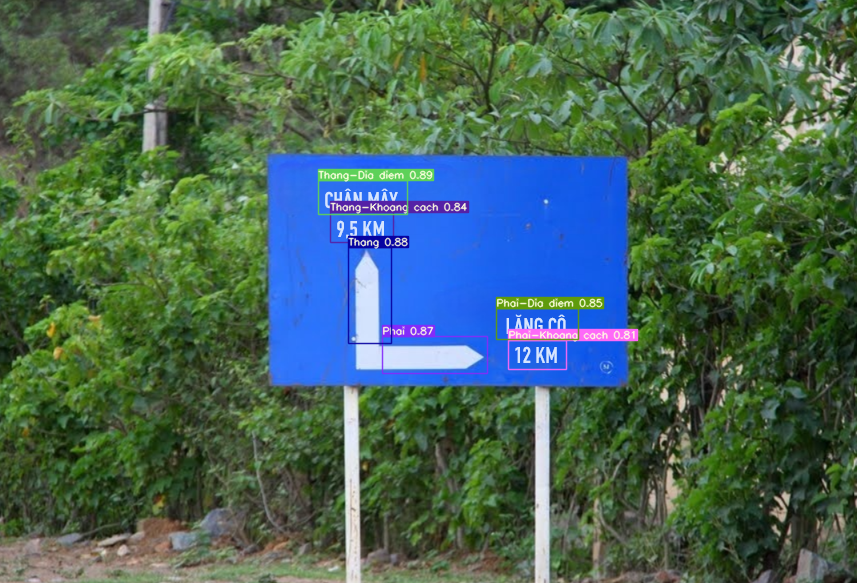

In [ ]:
yolo_detect(source_image_path , opt)